# Tesseract test

In [1]:
import os, sys
import nltk

import numpy as np

# Change directory
os.getcwd().split('/')[-1] == "experimentation" and os.chdir('../')
    

# Import the full model
from src.text_processor import *
from src.text_postprocessor import *

from src.full_model import FullModel

E0000 00:00:1738270487.996418  106904 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738270488.002465  106904 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
def jaccard_similarity(t1, t2):
    """
    Calculates the Jaccard similarity between two texts.
    
    Parameters:
    text1 (str): First text.
    text2 (str): Second text.
    
    Returns:
    float: Jaccard similarity between the two texts (value between 0 and 1).
    """
    # Convert texts into sets of words
    set1 = set(t1.lower().split())
    set2 = set(t2.lower().split())
    
    # Calculate intersection and union of the sets
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    
    # Calculate Jaccard similarity
    if len(union) == 0:
        return 0.0
    else:
        return len(intersection) / len(union)

In [3]:
def cer_similarity(t1, t2):
    """
    Calculates the Character Error Rate (CER) between two texts.
    
    Parameters:
    text1 (str): First text.
    text2 (str): Second text.
    
    Returns:
    float: CER between the two texts (value between 0 and 1).
    """
    # Calculate the edit distance
    dist = nltk.edit_distance(t1, t2)
    
    # Calculate the CER
    if len(t1) == 0 and len(t2) == 0:
        return 0.0
    else:
        return dist / max(len(t1), len(t2))

In [4]:
def read_text(path):
    
    with open(path, "r") as file:
        text = file.read()
        return text

In [5]:
import re

def normalize_text(text):
    
    palabras = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    return ' '.join(palabras)

In [6]:
precision = 3
crops_path = "./dataset/crops"

directory = [i.split('.')[-2] for i in os.listdir(f"{crops_path}/images")]

print(directory)

images = [f"{crops_path}/images/{item}.png" for item in directory]
texts = [read_text(f"{crops_path}/texts/{item}.txt") for item in directory]

texts = [normalize_text(text) for text in texts]

results = parametric_search(images)

len0 = len(results)
len1 = len(results[0])

mt_jaccard = np.zeros((len0, len1))
mt_cer = np.zeros((len0, len1))

for i in range(len(results)):
    
    real_text = texts[i]
    
    for j in range(len(results[0])):
        
        results[i][j] = normalize_text(results[i][j])
        
        mt_jaccard[i, j] = jaccard_similarity(real_text, results[i][j])
        mt_cer[i, j] = cer_similarity(real_text, results[i][j])
        
    print("\n")

['22-02-23', '21-59-45', '22-01-06', '22-01-35', '21-58-54', '22-03-37', '22-00-22', '21-58-31', '22-00-41', '22-04-35', '22-03-03', '21-58-05', '22-04-01']




























In [7]:
for i in range(len(results)):
    
    print(f"Real text {i}: {texts[i]}\n")
    
    print(", ".join([f"{mt_jaccard[i, j]:.{precision}f}" for j in range(len(results[0]))]))
    print(", ".join([f"{mt_cer[i, j]:.{precision}f}" for j in range(len(results[0]))]))
        
    print("\n")

Real text 0: el ilustre criminalista dr enrique roig no puede aceptar el homenaje que con tanto entusiasmo se estaba organizando los organizadores de dicho homenaie cronis as de tribunales de los ca pitalinos se inclinan ante el deseo reiterado del dr roig de recibir cada uno de ellos una carta diciendo queridos y buenos amigos personalmente les he rogado desistieran de su generoso en homecenajearme por mi restablecimiento lo que en lo absoluto no merez co ahora por este medio vuelvo a rogarles la de dicho acto mi gratitud como a las personas que me han crito por mi salud en cartas que como un preciado muy suyo agradecido de ustedes firmado enrique roig y agrega como p s si soy algo en mi de abogado a ustedes es a quienes se lo debo como ya indicamos al lanzar la idea del homenaje ni siquiera consulado al dr roig y me nos a su por dicho motivo admitimos ias numerosas inscripciones que llegado pero no se pusieron en los recibos para el cobro no nos resta pues por nuestra parte q lamenta

In [8]:
# Select best average case

mean_efectivity_jaccard = np.mean(np.array(mt_jaccard), axis=0)
mean_efectivity_cer = np.mean(np.array(mt_cer), axis=0)

best_fit_jaccard = np.argmax(mean_efectivity_jaccard)
best_fit_cer = np.argmin(mean_efectivity_cer)

best_score_jaccard = mean_efectivity_jaccard[best_fit_jaccard]
best_score_cer = mean_efectivity_cer[best_fit_cer]

print(f"Best fit jaccard: {best_fit_jaccard} with score {best_score_jaccard}")
print(f"Best fit cer: {best_fit_cer} with score {best_score_cer}")


Best fit jaccard: 1 with score 0.7027208973844729
Best fit cer: 1 with score 0.09963021841388048


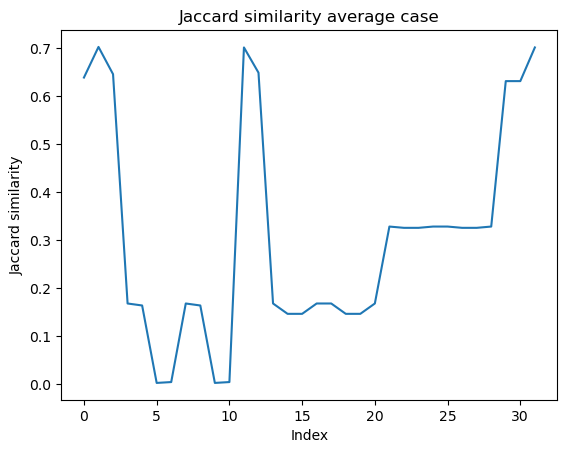

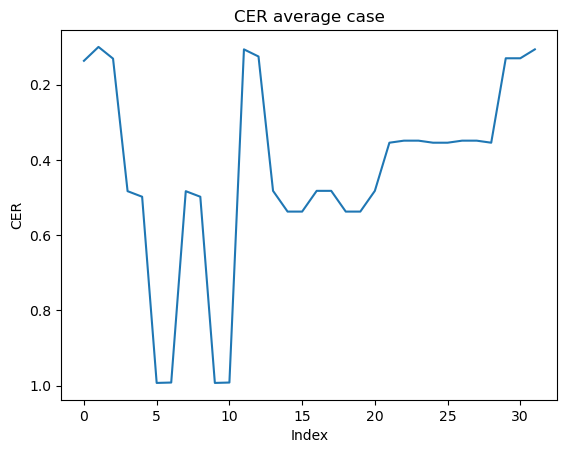

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# Pyplot 

# Jaccard similarity average case
plt.plot(mean_efectivity_jaccard)
plt.xlabel("Index")
plt.ylabel("Jaccard similarity")
plt.title("Jaccard similarity average case")
plt.show()

# CER average case
plt.plot(mean_efectivity_cer)
plt.xlabel("Index")
plt.ylabel("CER")
plt.title("CER average case")
plt.gca().invert_yaxis()
plt.show()


In [10]:
import plotly.express as px
import plotly.graph_objects as go

# Generate same plots with plotly
px.line(
    y=mean_efectivity_jaccard, title="Jaccard similarity average case"
).update_layout(yaxis_title="Jaccard similarity").update_layout(
    xaxis_title="pre-processing"
).show()
px.line(
    y=mean_efectivity_cer, title="CER average case"
).update_layout(yaxis_title="CER").update_layout(
    xaxis_title="pre-processing"
).show()

# Post-processing tests

In [11]:
from src.text_postprocessor import *
import plotly.graph_objects as go


llm = OpenAIModel()

# Extract LLM results
llm_results = [llm.fix_text(result[1]) for result in results]
llm_results = [normalize_text(text) for text in llm_results]

# Calculate Jaccard similarity for LLM results
llm_jaccard = [jaccard_similarity(texts[i], llm_results[i]) for i in range(len(texts))]

# Calculate CER for LLM results
llm_cer = [cer_similarity(texts[i], llm_results[i]) for i in range(len(texts))]

llm = OpenAIModel()

In [12]:
for i in range(len(results)):
    
    print(f"Real text {i}:\n{texts[i]}\n")
    
    print(f"Tesseract text {i}:\n{results[i][1]}\n")
    
    print(f"Llm text {i}:\n{llm_results[i]}\n")
    
    print("Distance: ", llm_jaccard[i], " Previous: ", mt_jaccard[i, 1])
    print("Distance: ", llm_cer[i], " Previous: ", mt_cer[i, 1])

Real text 0:
el ilustre criminalista dr enrique roig no puede aceptar el homenaje que con tanto entusiasmo se estaba organizando los organizadores de dicho homenaie cronis as de tribunales de los ca pitalinos se inclinan ante el deseo reiterado del dr roig de recibir cada uno de ellos una carta diciendo queridos y buenos amigos personalmente les he rogado desistieran de su generoso en homecenajearme por mi restablecimiento lo que en lo absoluto no merez co ahora por este medio vuelvo a rogarles la de dicho acto mi gratitud como a las personas que me han crito por mi salud en cartas que como un preciado muy suyo agradecido de ustedes firmado enrique roig y agrega como p s si soy algo en mi de abogado a ustedes es a quienes se lo debo como ya indicamos al lanzar la idea del homenaje ni siquiera consulado al dr roig y me nos a su por dicho motivo admitimos ias numerosas inscripciones que llegado pero no se pusieron en los recibos para el cobro no nos resta pues por nuestra parte q lamenta

In [13]:
# Create the plot
fig = go.Figure()

# Add trace for LLM results
fig.add_trace(go.Scatter(
    x=list(range(len(llm_jaccard))),
    y=llm_jaccard,
    mode='lines+markers',
    name='LLM Jaccard Similarity'
))

# Add trace for mt_jaccard[i, 1]
fig.add_trace(go.Scatter(
    x=list(range(len(mt_jaccard))),
    y=mt_jaccard[:, 1],
    mode='lines+markers',
    name='Tesseract Jaccard Similarity'
))

# Update layout
fig.update_layout(
    title='LLM Result vs vs just Tesseract',
    xaxis_title='Index',
    yaxis_title='Jaccard Similarity',
    legend_title='Legend'
)

# Show the plot
fig.show()

In [14]:
# Create the plot
fig = go.Figure()

# Add trace for LLM results
fig.add_trace(go.Scatter(
    x=list(range(len(llm_cer))),
    y=llm_cer,
    mode='lines+markers',
    name='LLM CER Similarity'
))

# Add trace for mt_cer[i, 1]
fig.add_trace(go.Scatter(
    x=list(range(len(mt_cer))),
    y=mt_cer[:, 1],
    mode='lines+markers',
    name='Tesseract CER Similarity'
))

# Update layout
fig.update_layout(
    title='LLM Result vs just Tesseract',
    xaxis_title='Index',
    yaxis_title='CER Similarity',
    legend_title='Legend'
)

# Show the plot
fig.show()